In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!nvidia-smi

Sat May  4 01:41:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   47C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [5]:
import os

PATH = "/content/drive/MyDrive/Football/Football_Object_Detection"
os.chdir(PATH)

from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (16 CPUs, 62.8 GB RAM, 28.8/201.2 GB disk)


In [6]:
from ultralytics import YOLO

In [7]:
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.9 MB/s eta 0:00:00


In [8]:
from roboflow import Roboflow

rf = Roboflow(api_key="JKBhjxGlu9rXsc9oW6DT")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [9]:
!yolo task=detect mode=train model=yolov8m.pt data={PATH}/football-players-detection-1/data.yaml epochs=25 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.2.8 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Football/Football_Object_Detection/football-players-detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, str

In [10]:
!ls {PATH}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch586.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch587.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1714738256.4fc7f3f31c5c.3591.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch585.jpg


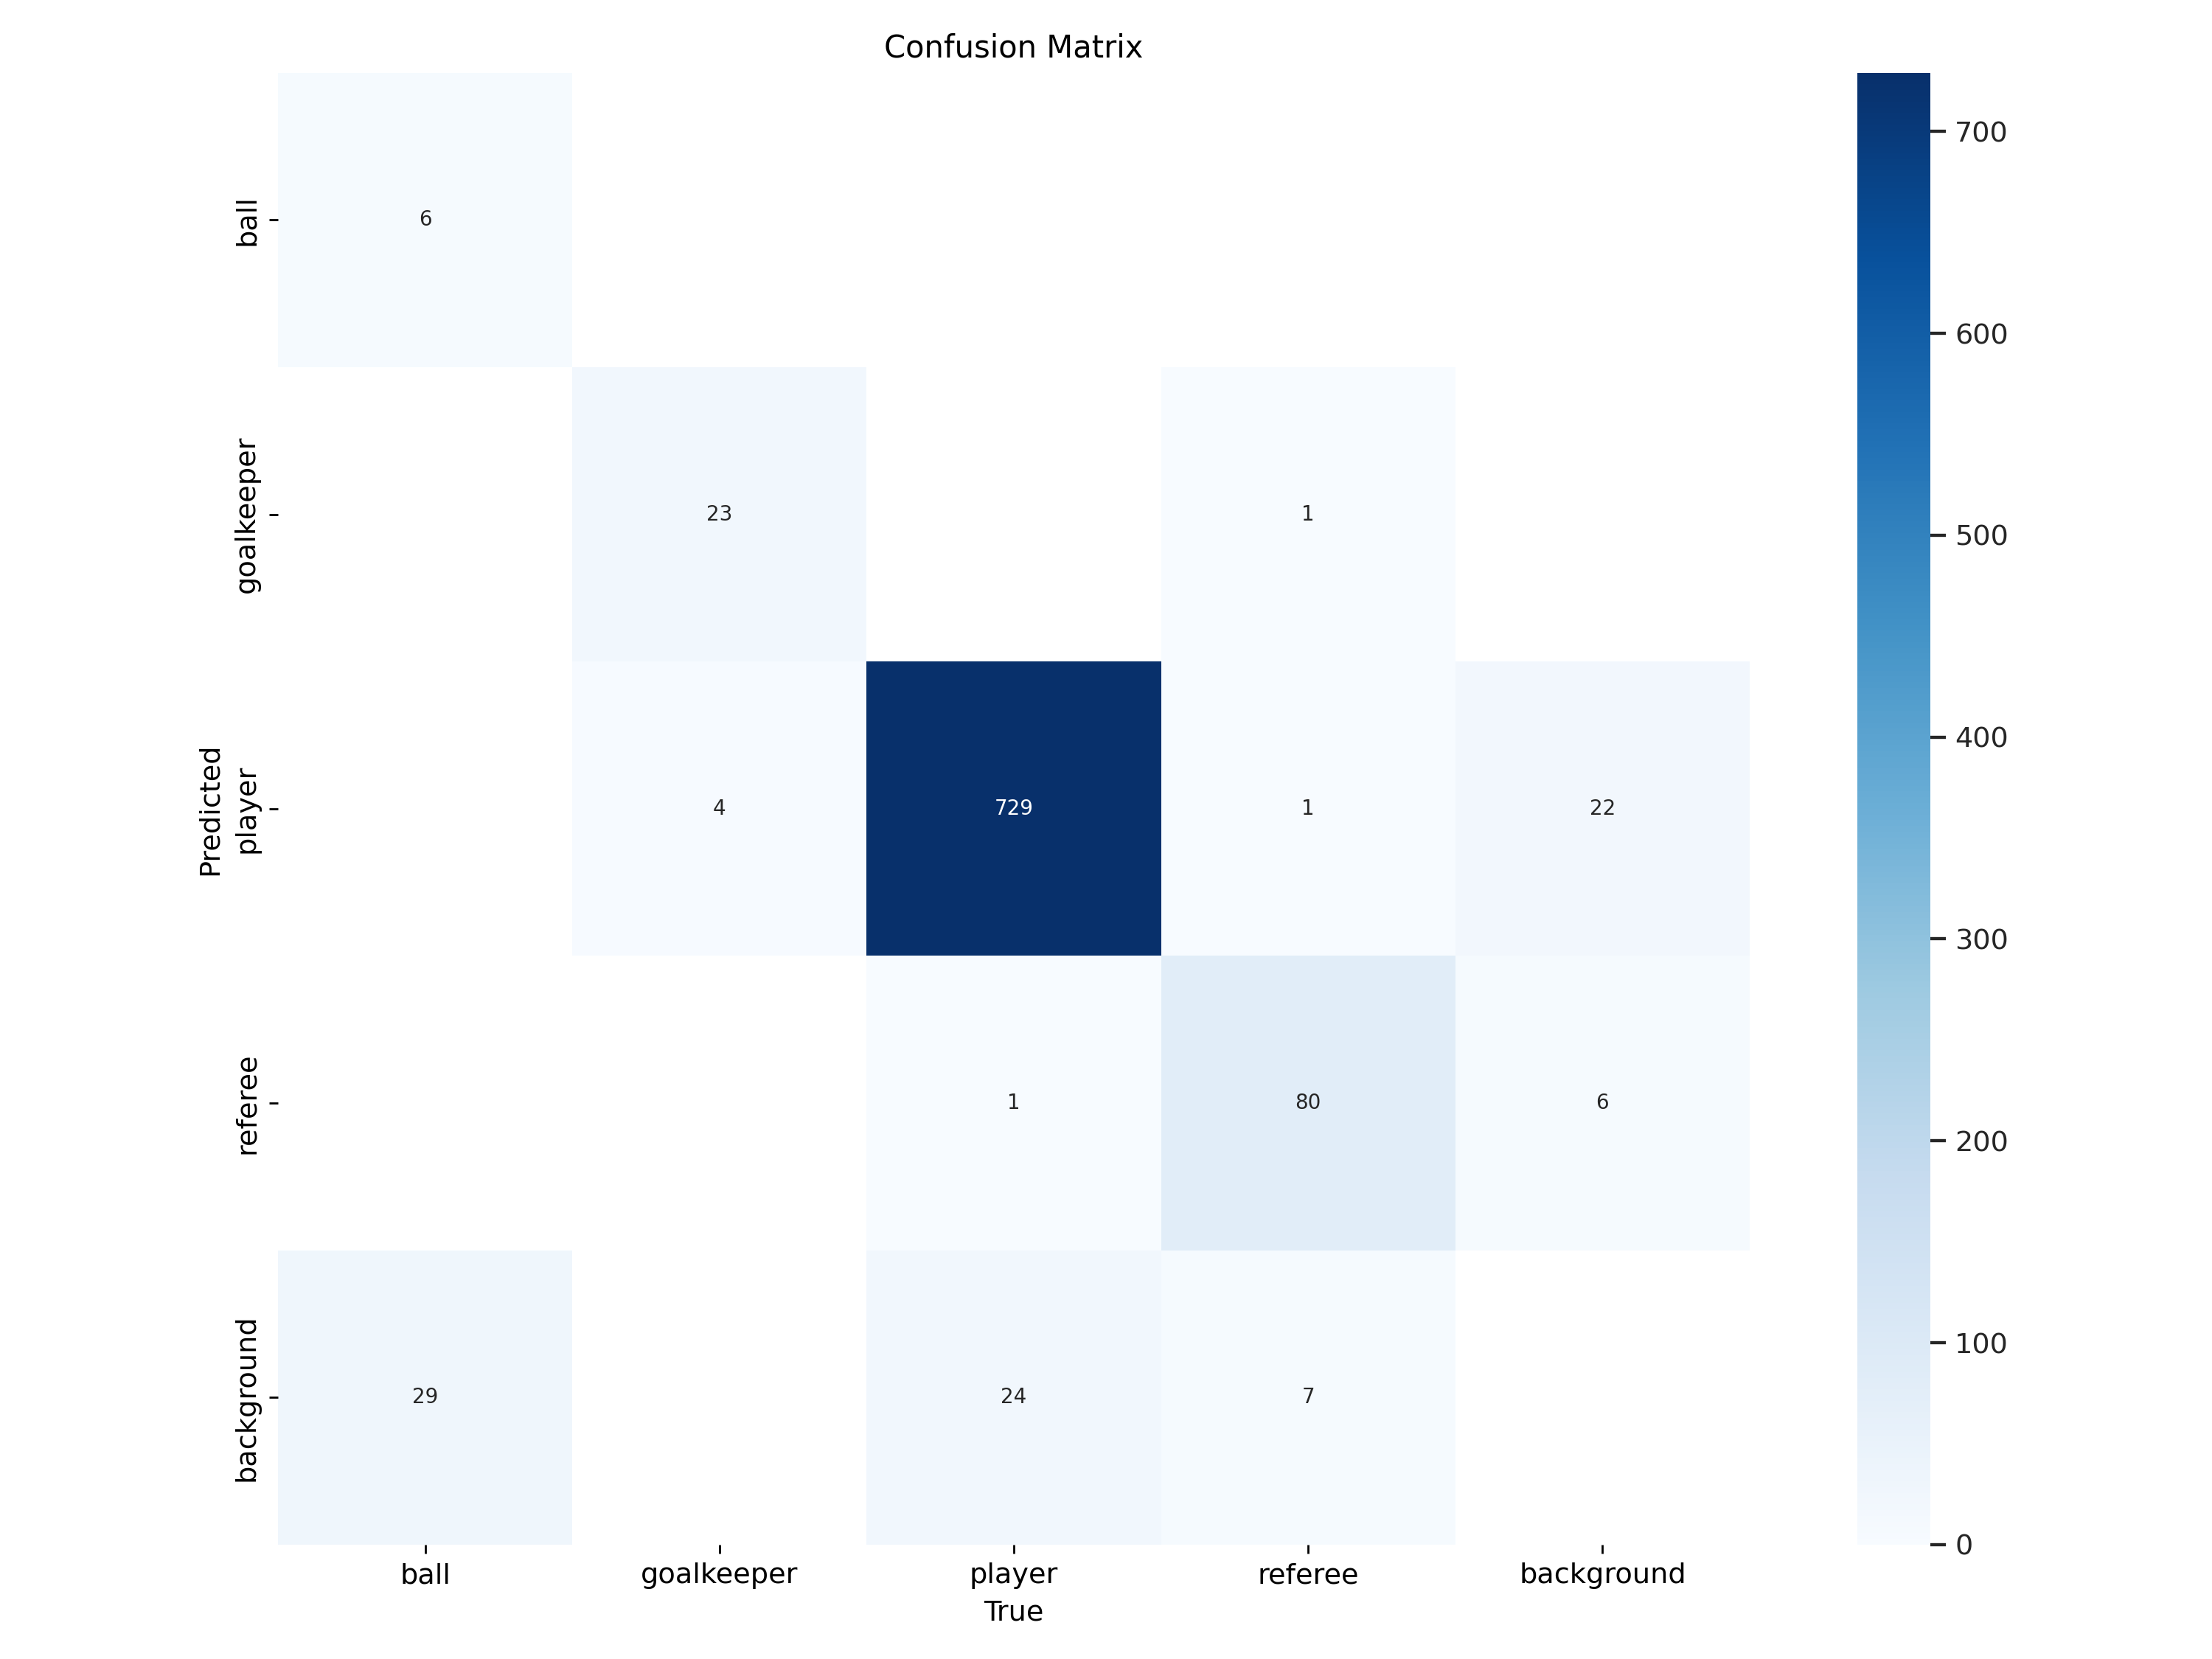

In [11]:
Image(filename=f'{PATH}/runs/detect/train/confusion_matrix.png', width=800)

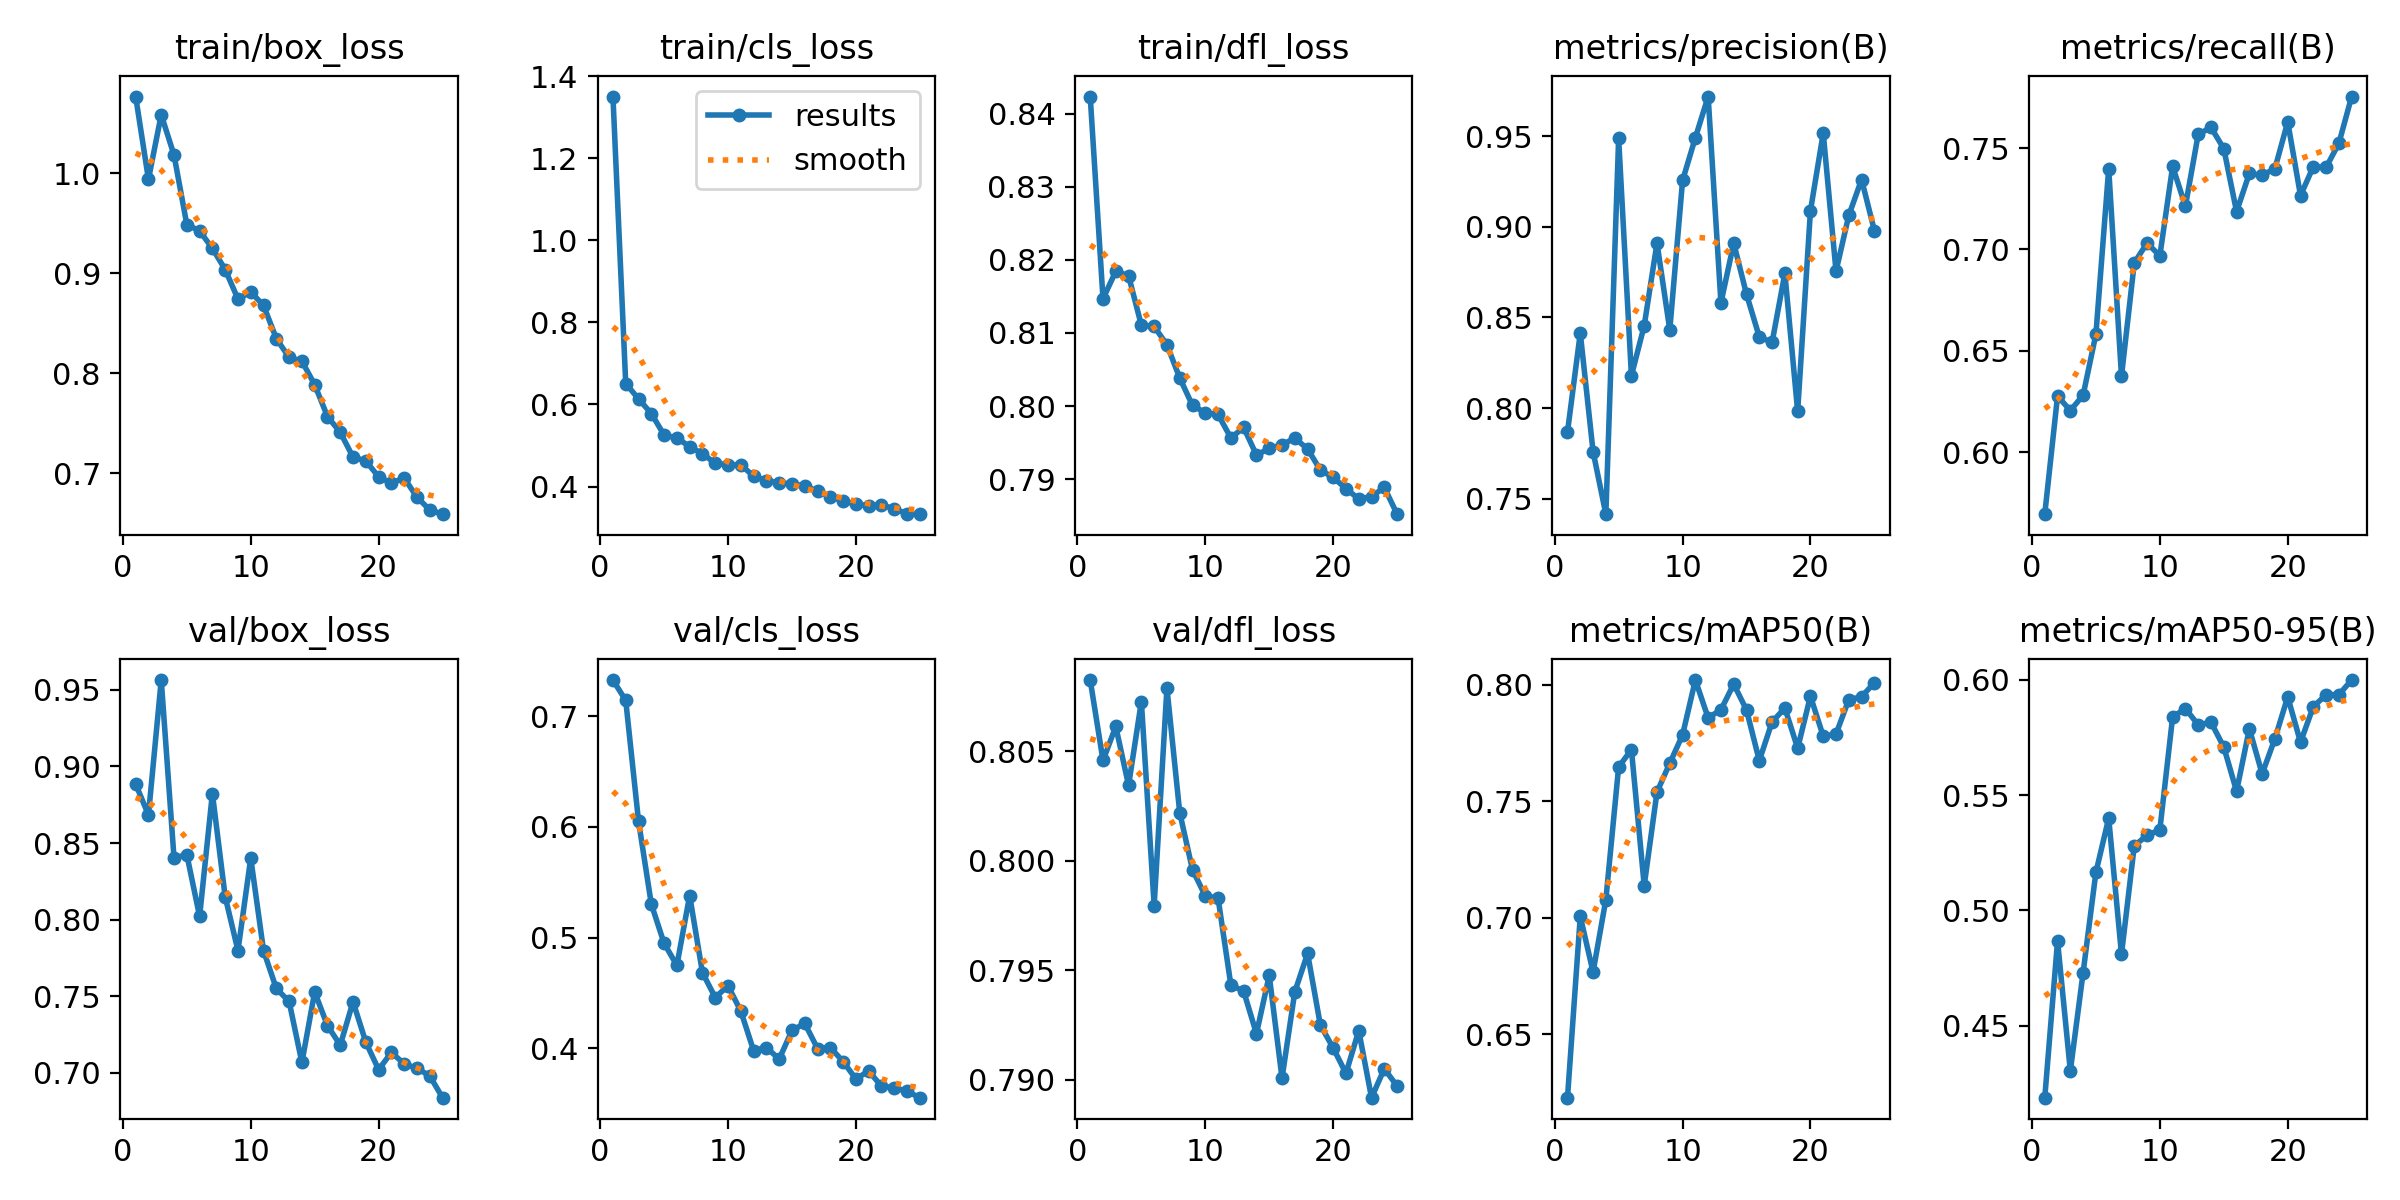

In [12]:
Image(filename=f'{PATH}/runs/detect/train/results.png', width=800)

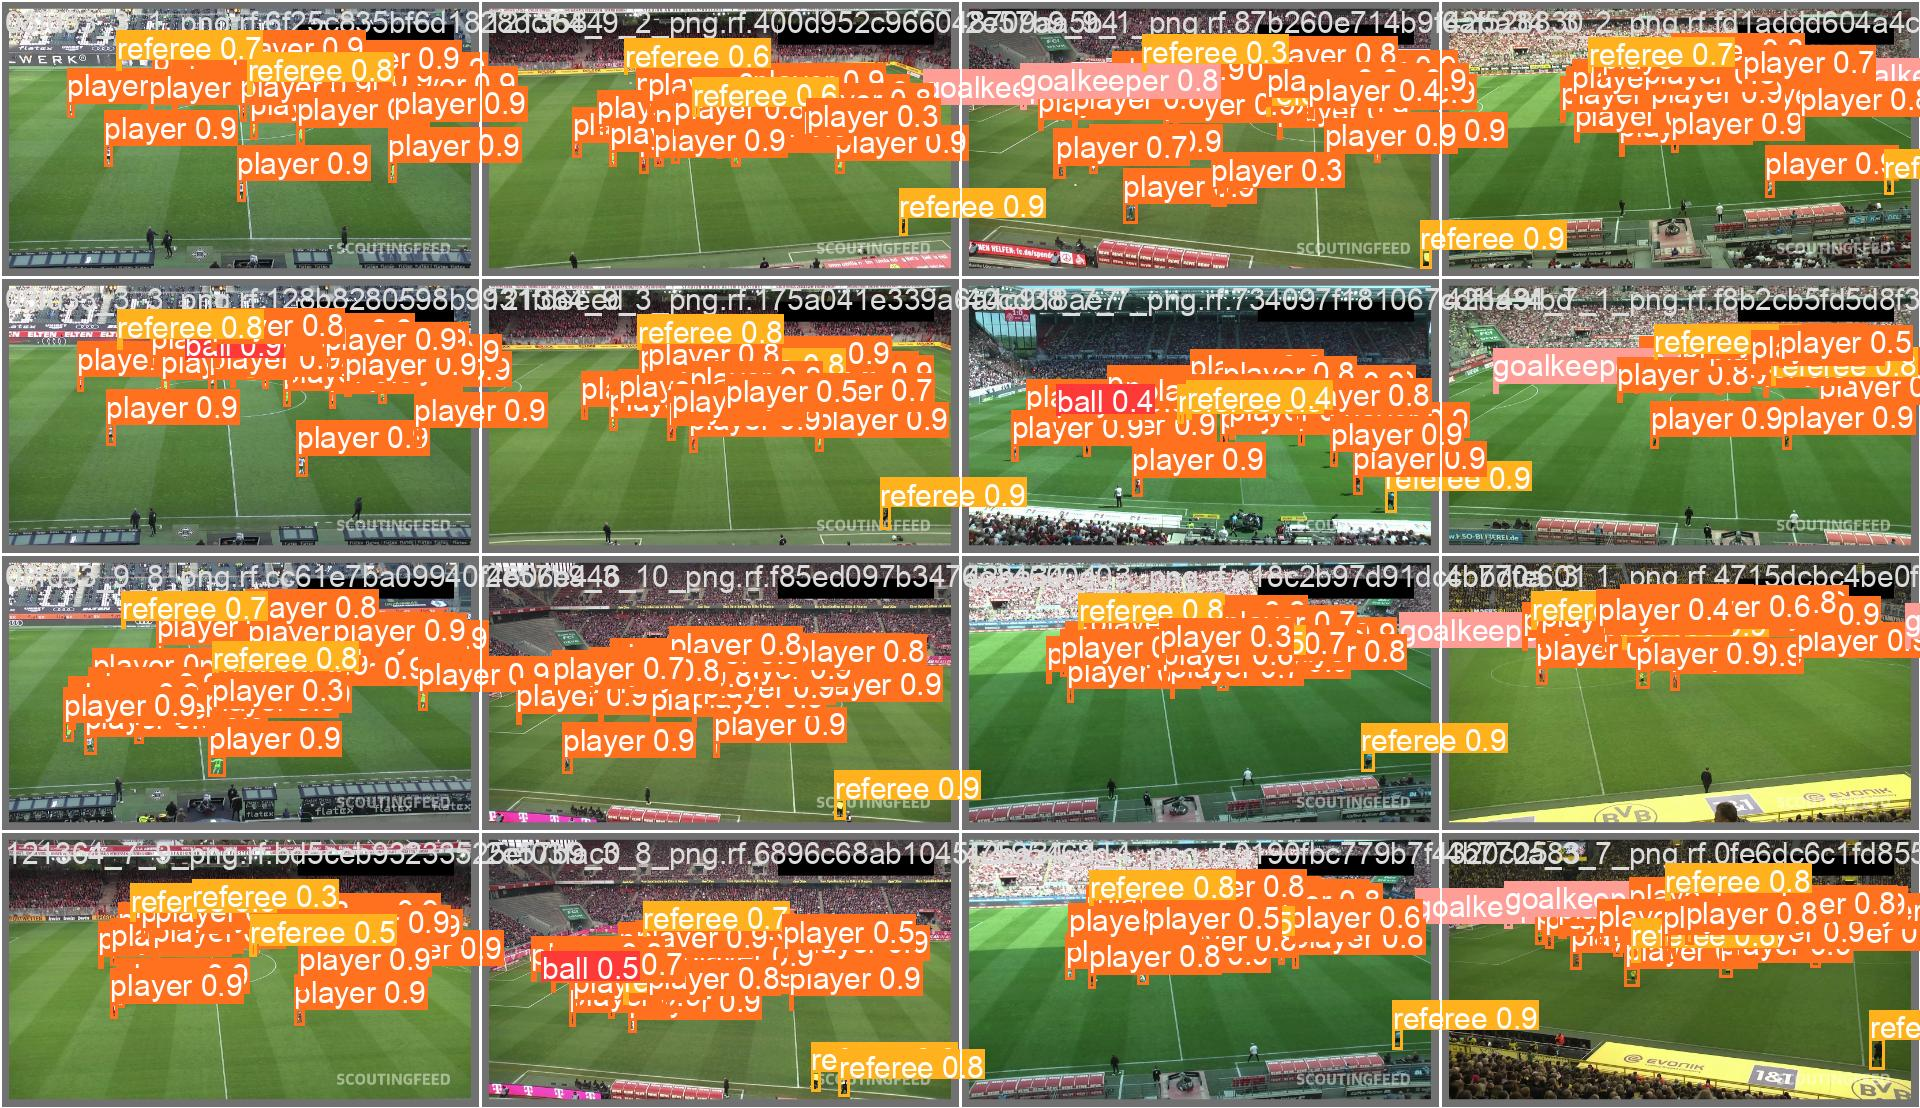

In [13]:
Image(filename=f'{PATH}/runs/detect/train/val_batch0_pred.jpg', width=800)

In [14]:
!yolo task=detect mode=val model={PATH}/runs/detect/train/weights/best.pt data={PATH}/football-players-detection-1/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/Football/Football_Object_Detection/football-players-detection-1/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33% 1/3 [00:01<00:03,  1.69s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67% 2/3 [00:06<00:03,  3.75s/it]WARNING ⚠️ NMS time limit 0.800s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  m

In [15]:
!ls {PATH}/runs/detect/val/

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg  val_batch2_pred.jpg


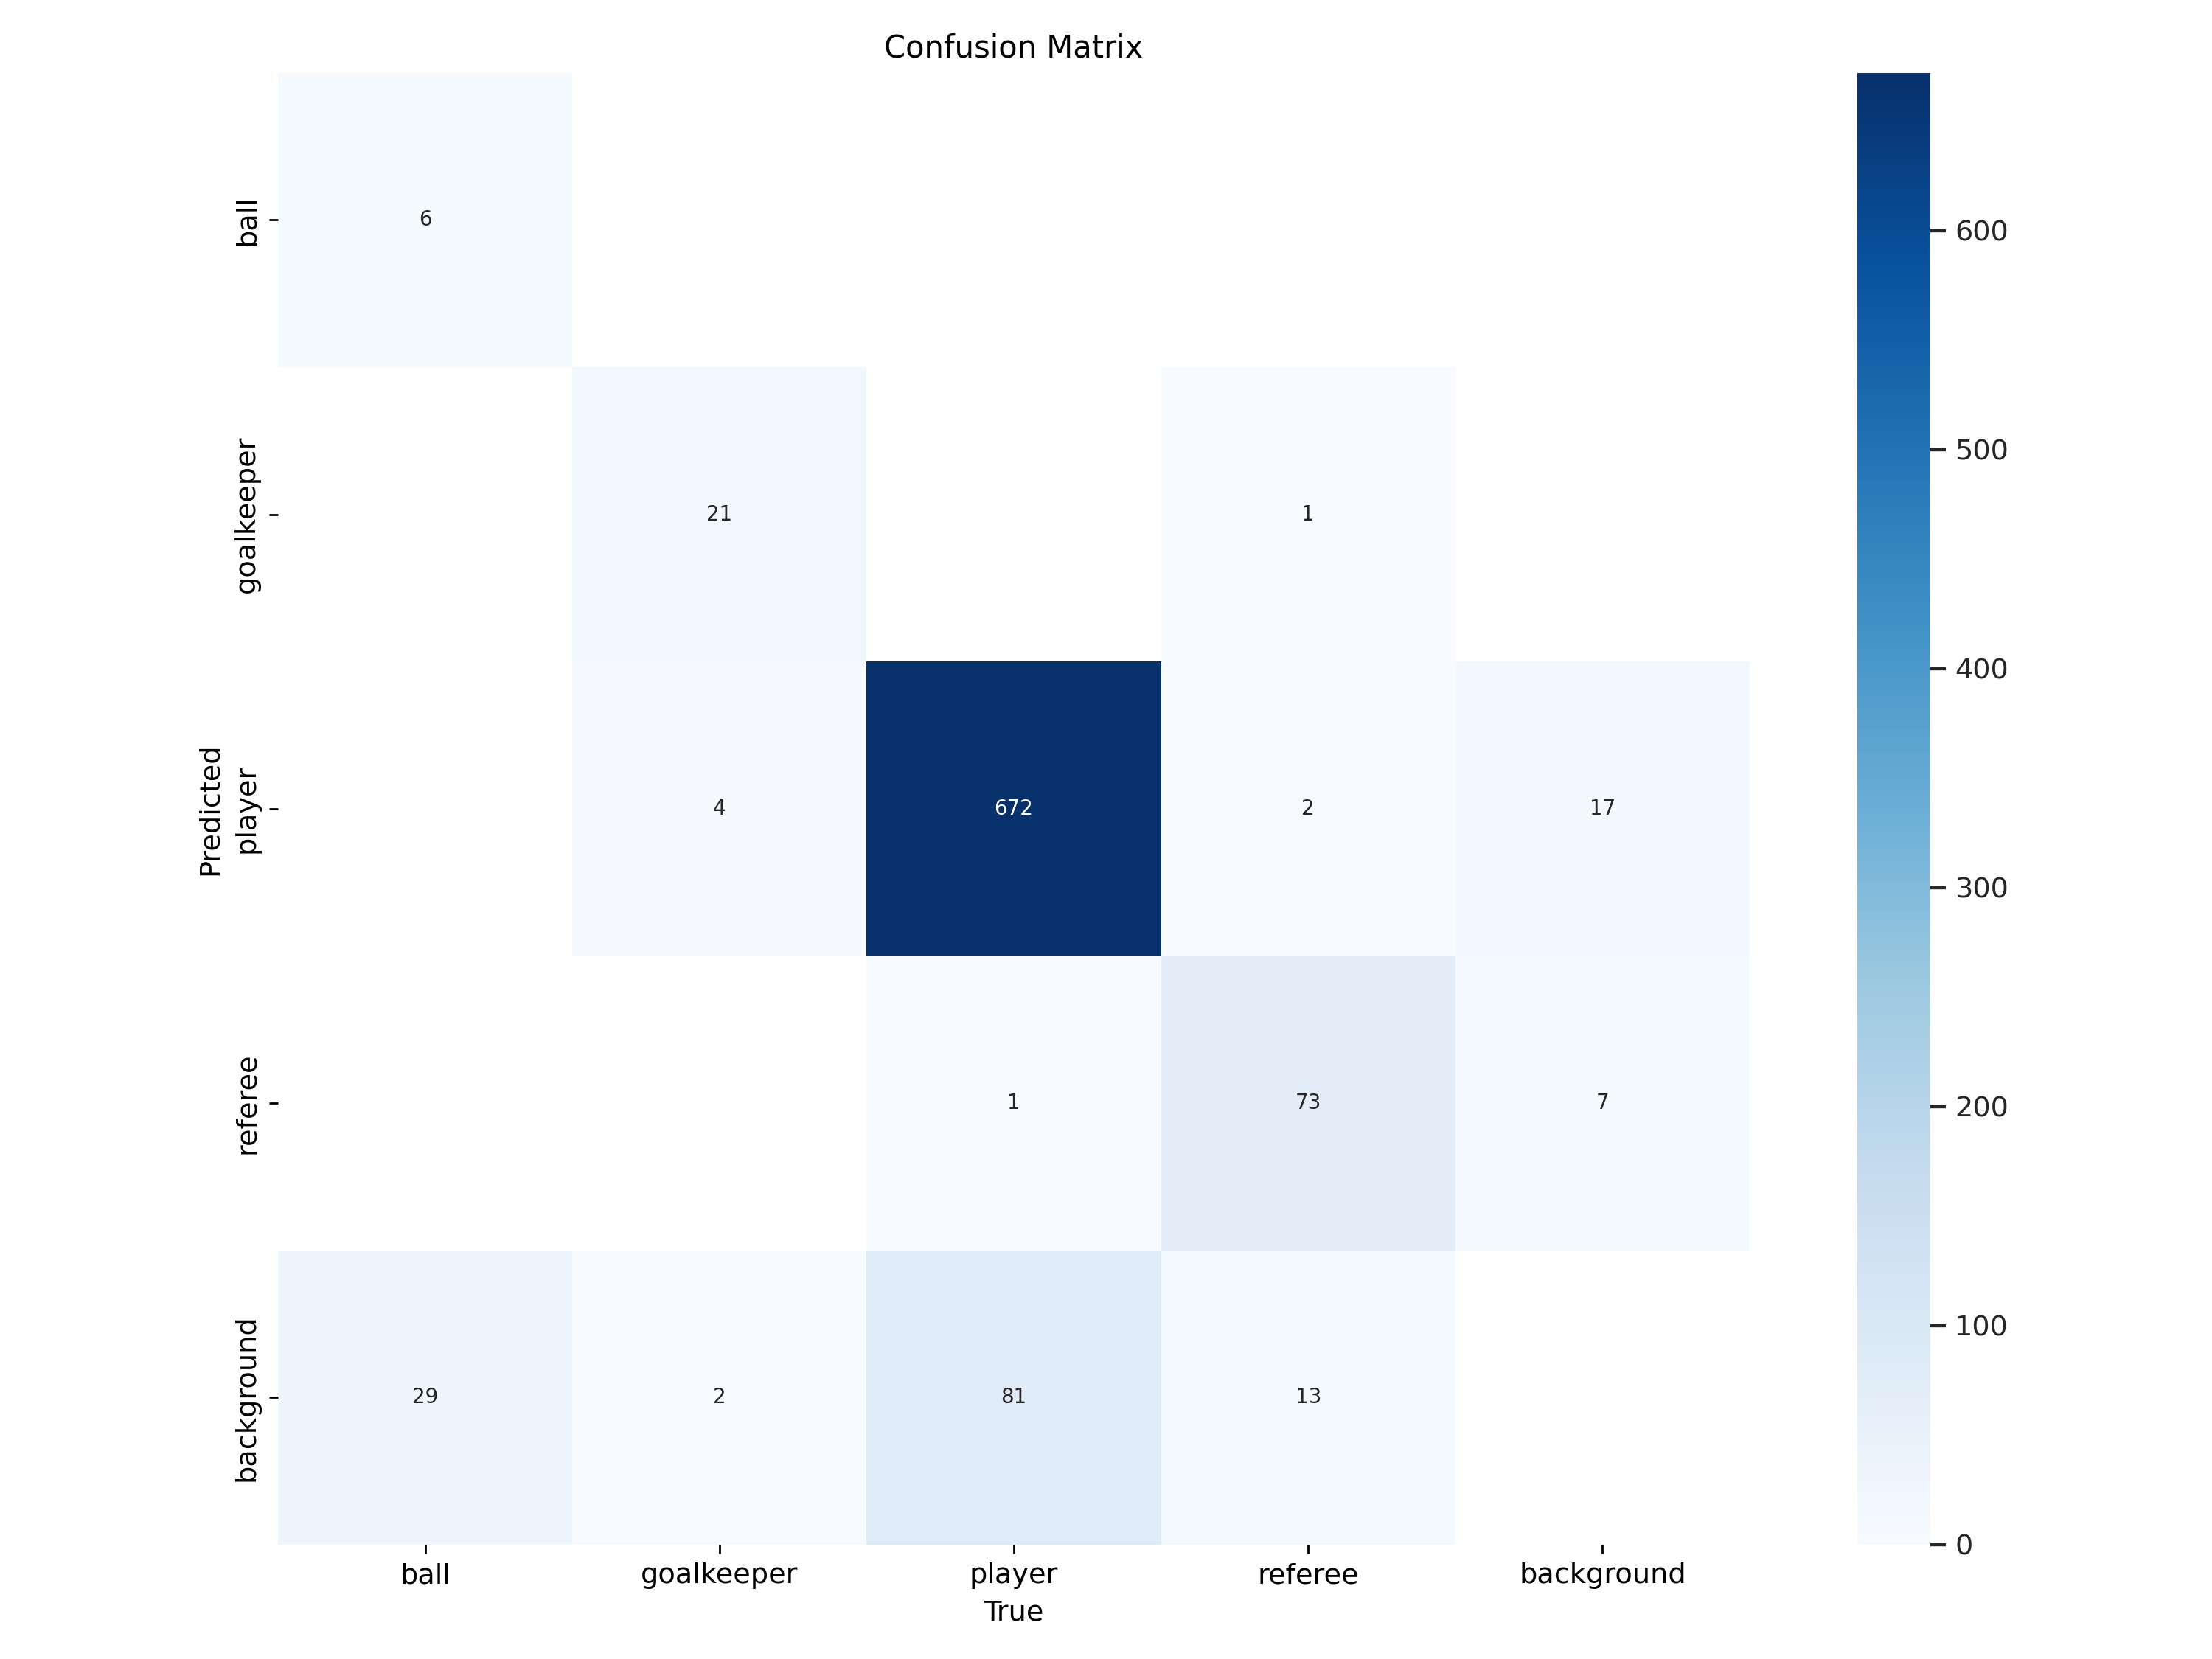

In [16]:
Image(filename=f'{PATH}/runs/detect/val/confusion_matrix.png', width=800)

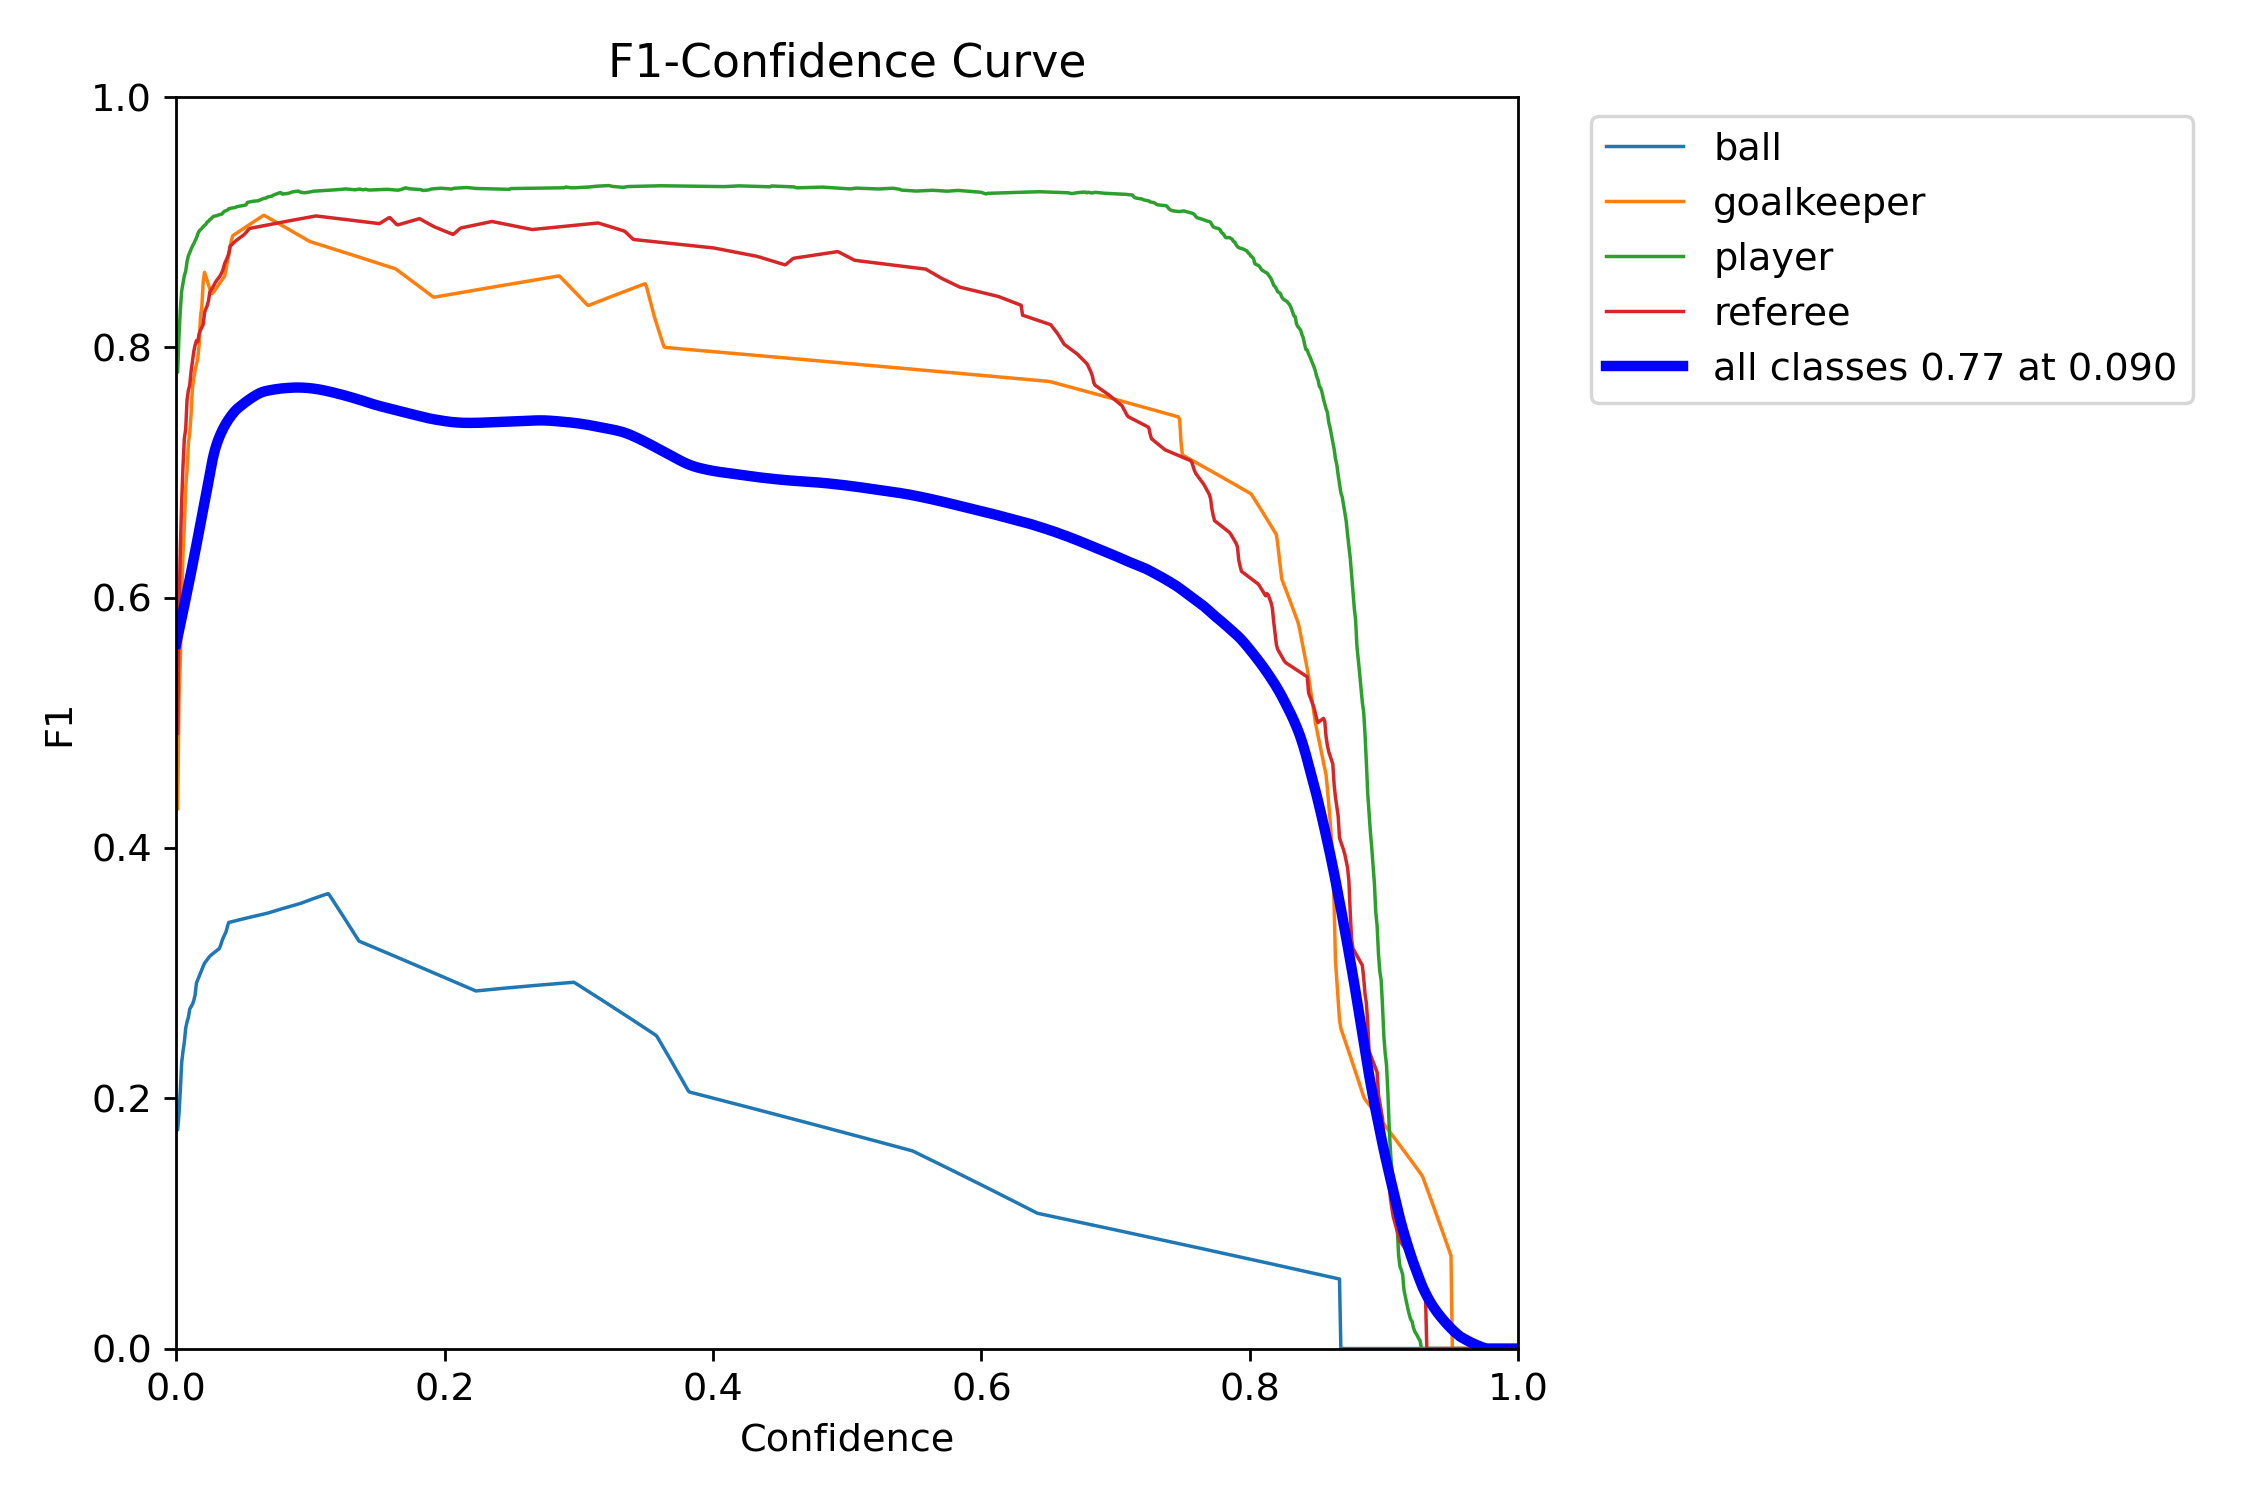

In [17]:
Image(filename=f'{PATH}/runs/detect/val/F1_curve.png', width=800)

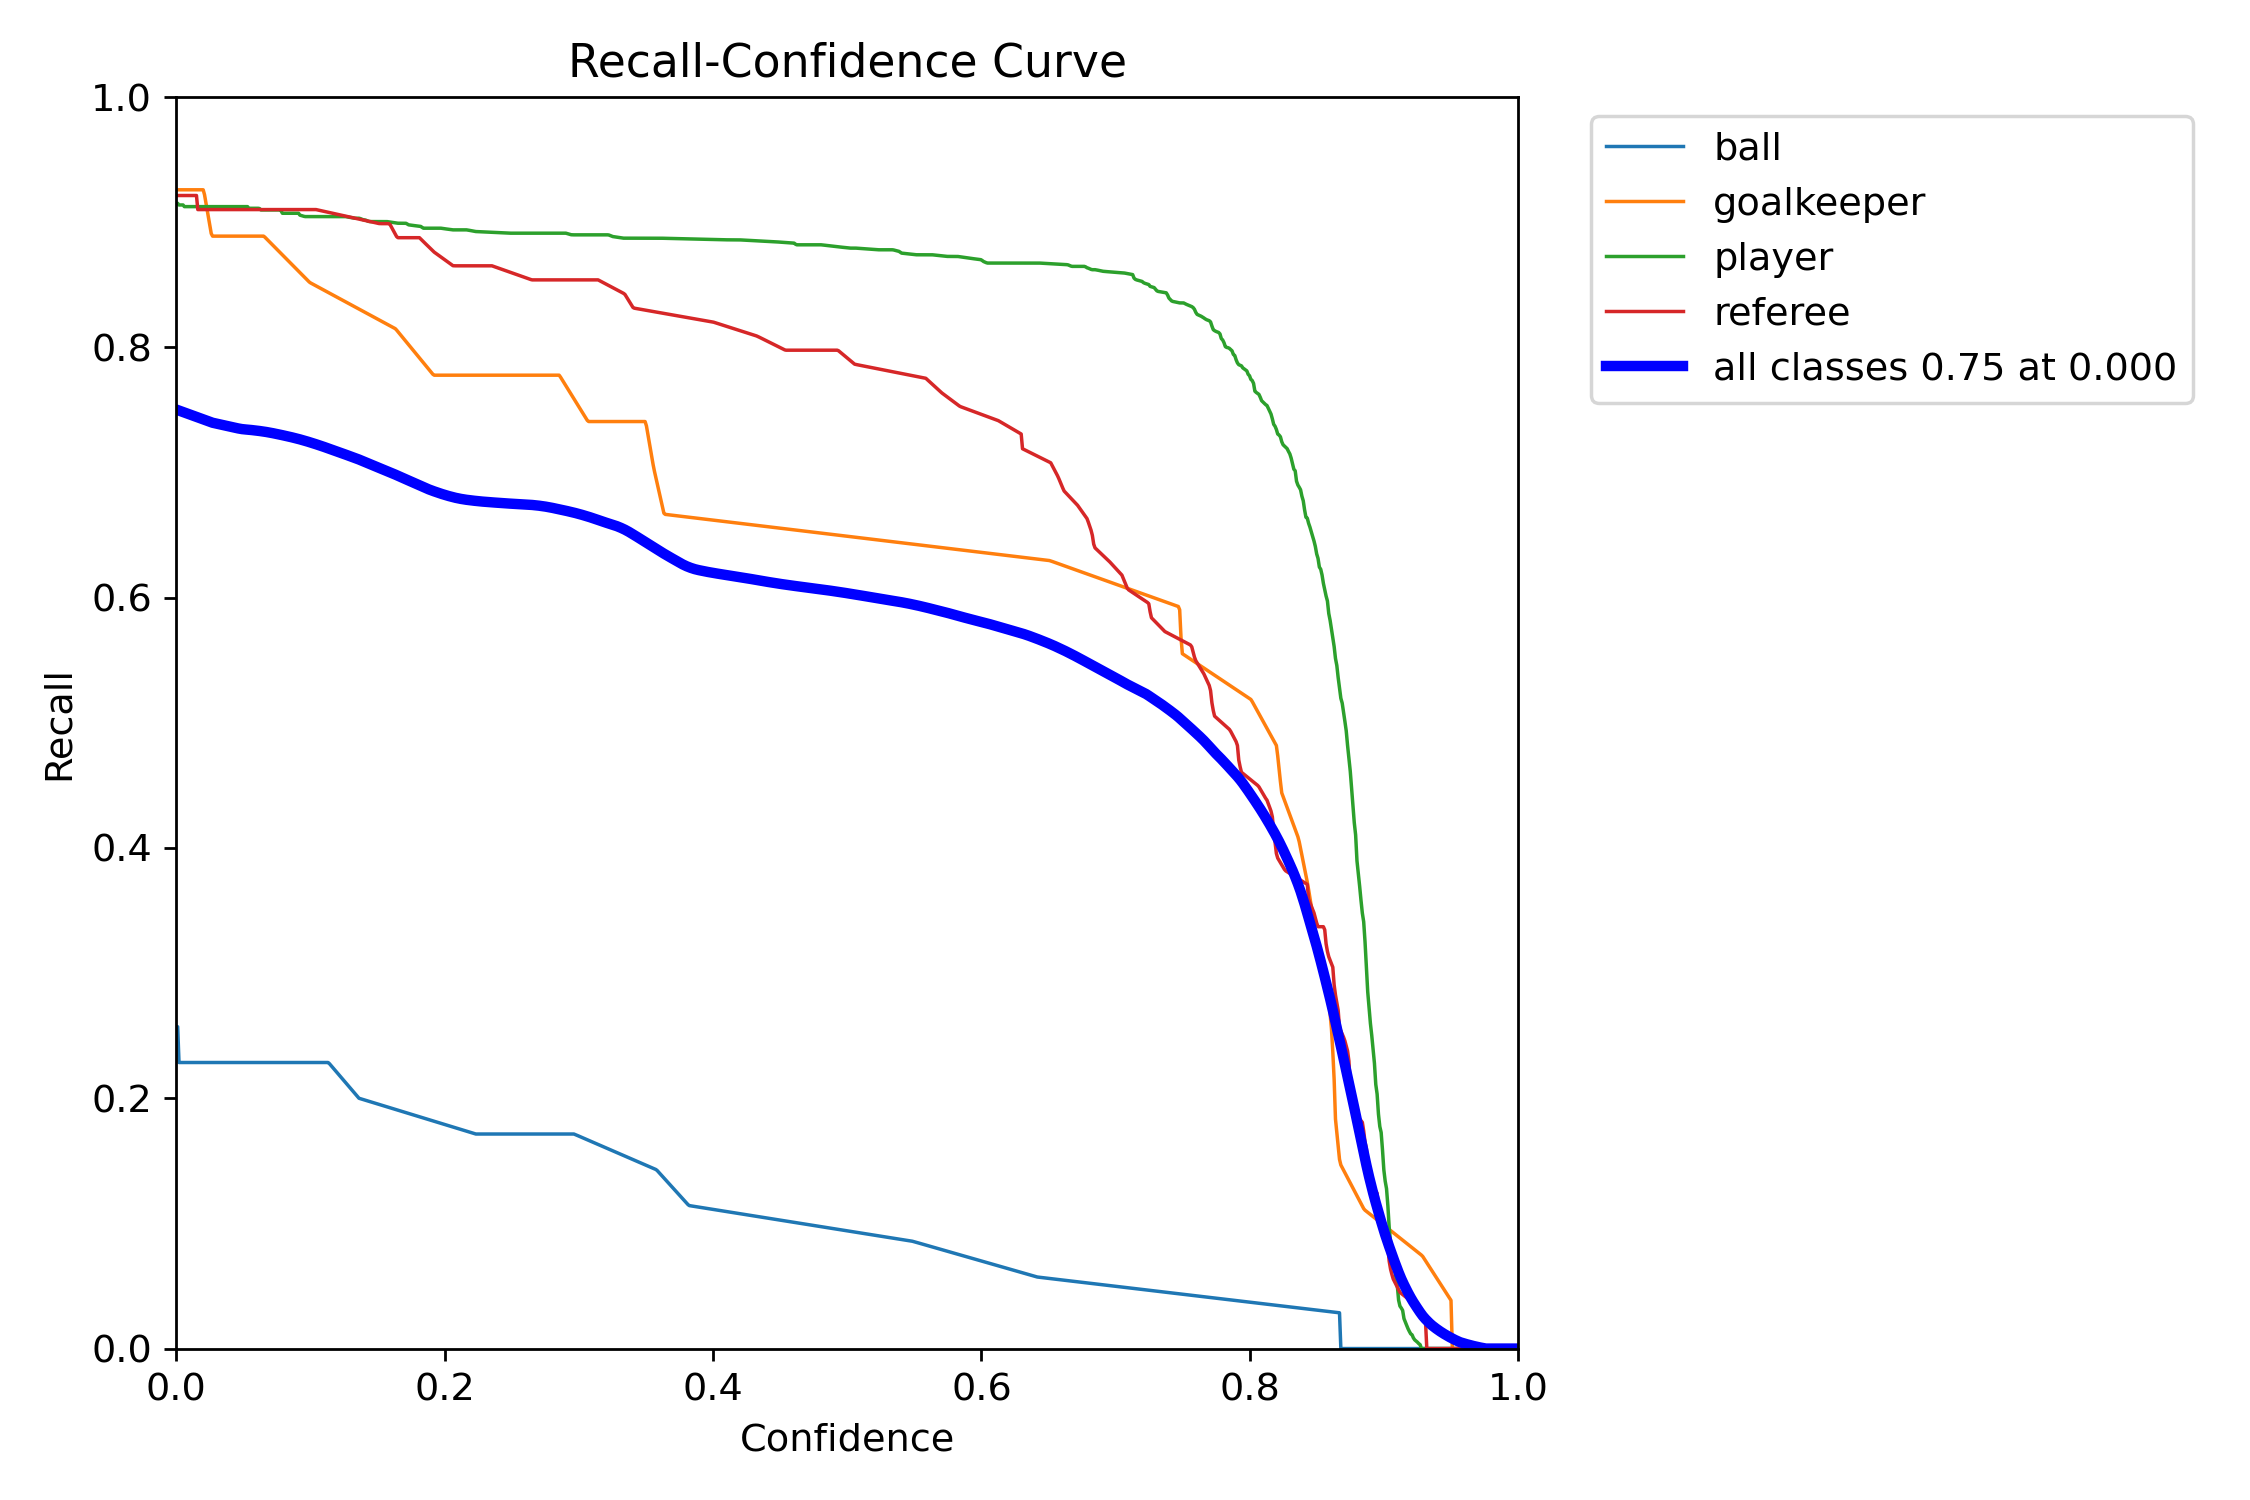

In [18]:
Image(filename=f'{PATH}/runs/detect/val/R_curve.png', width=800)

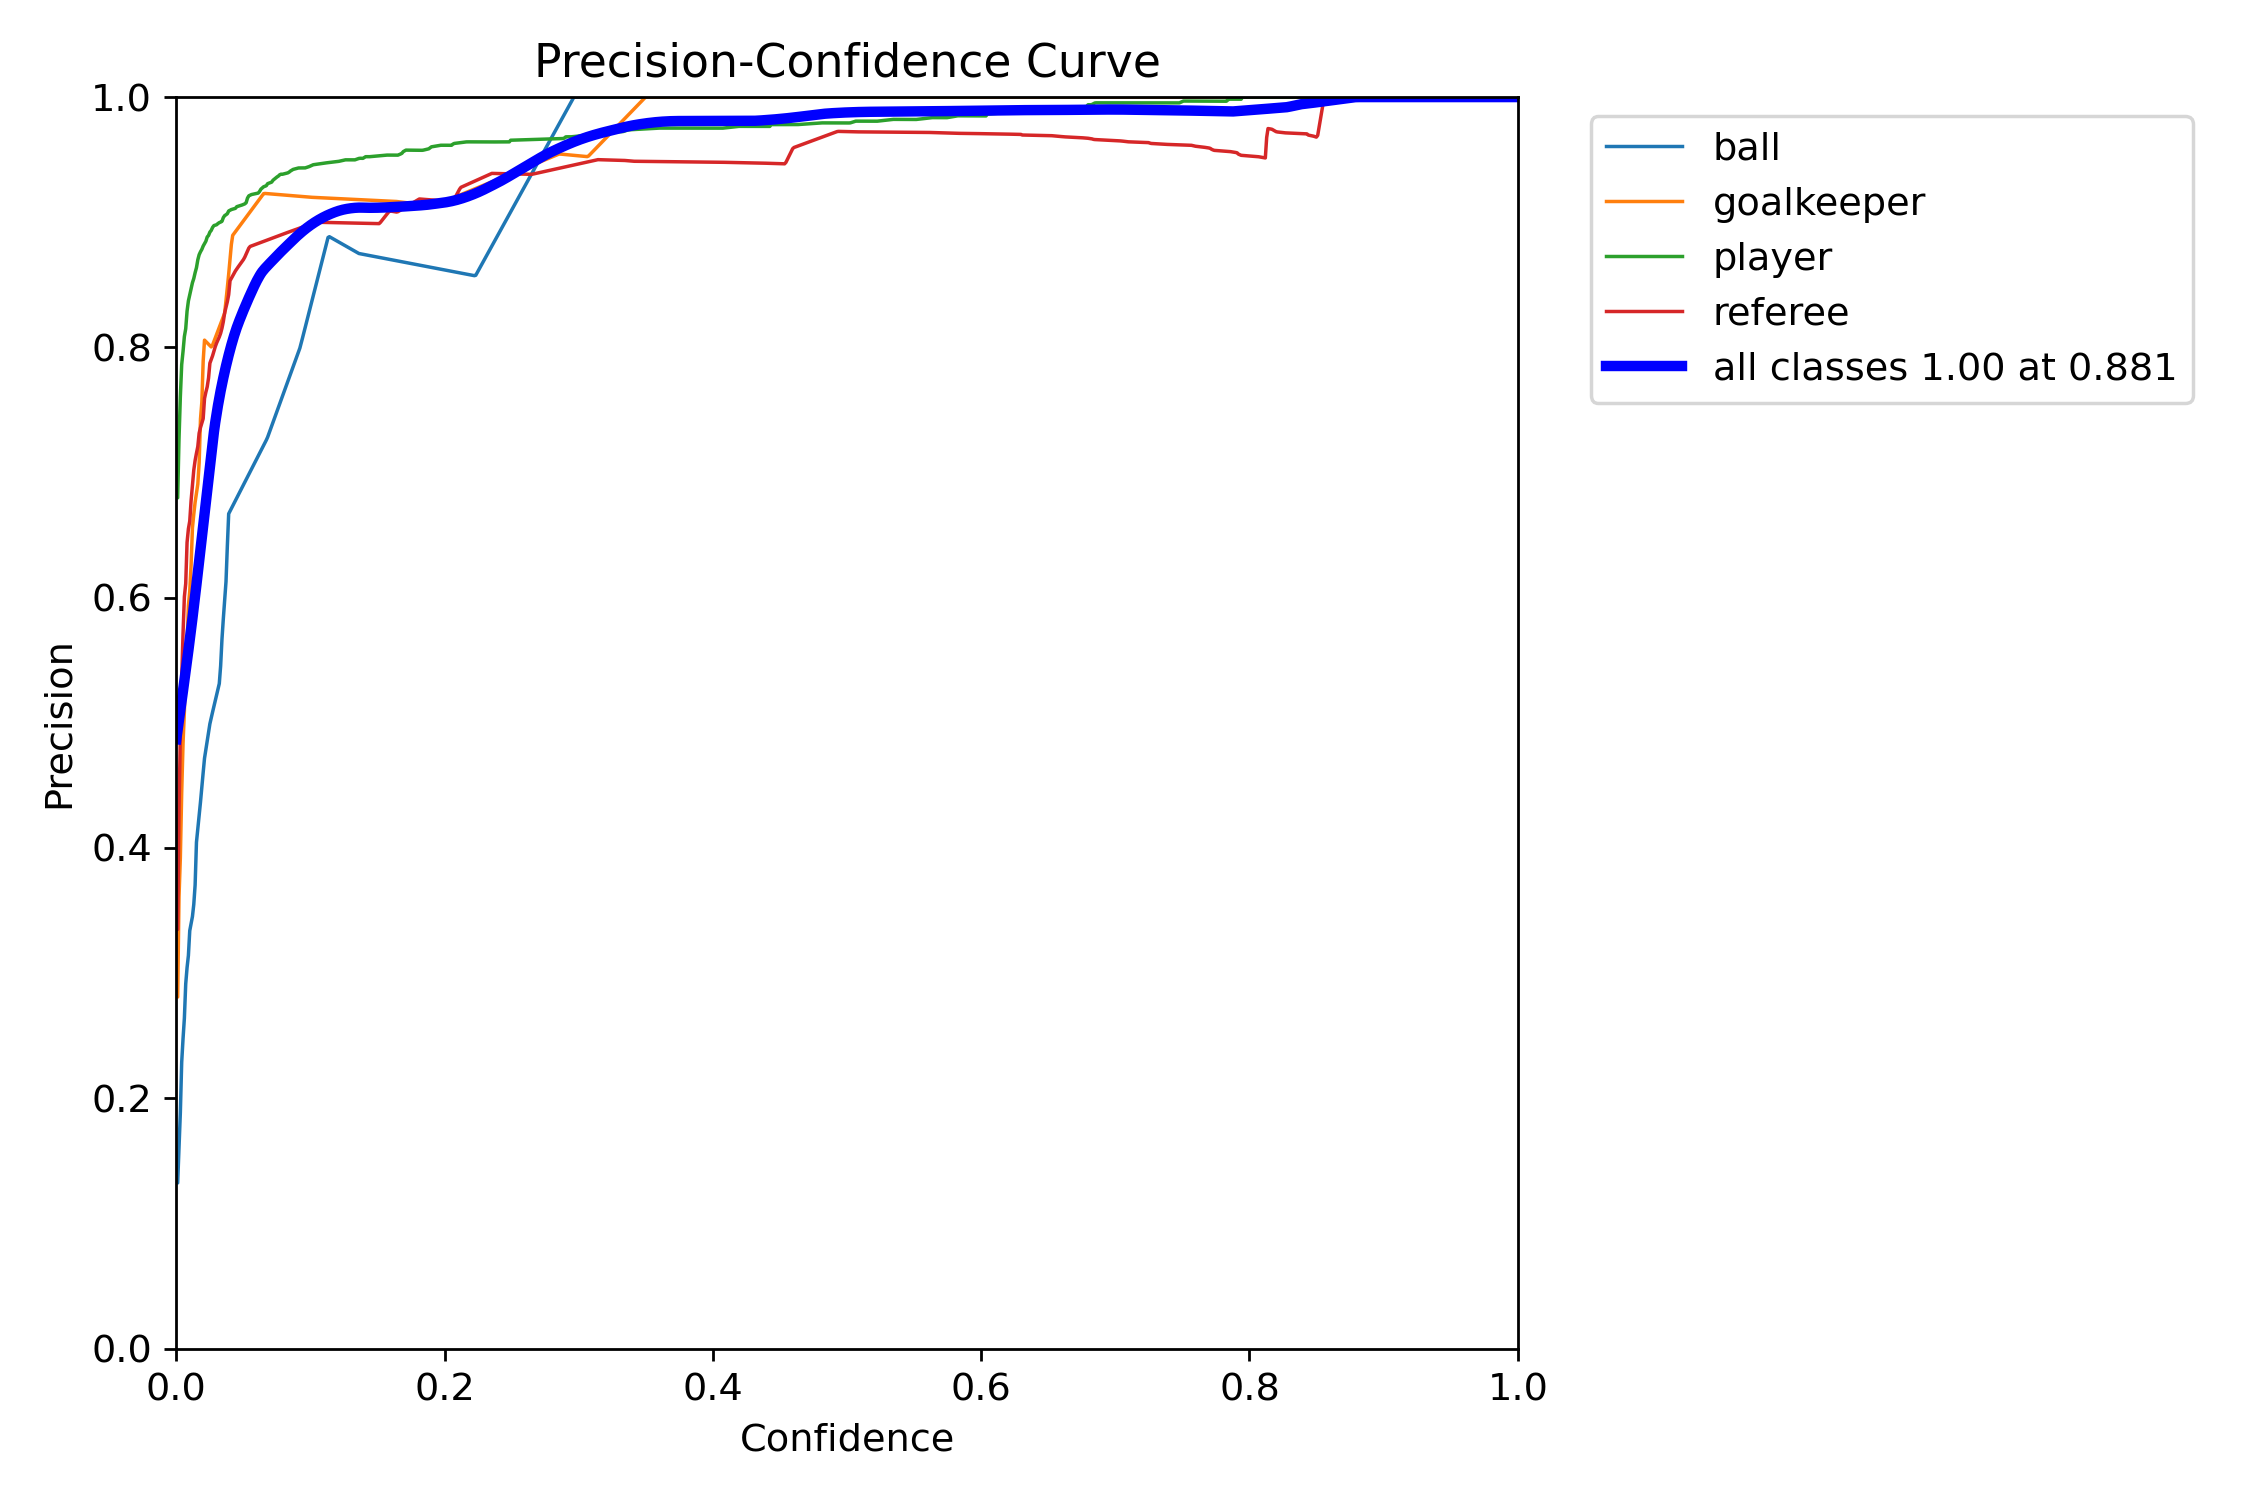

In [19]:
Image(filename=f'{PATH}/runs/detect/val/P_curve.png', width=800)

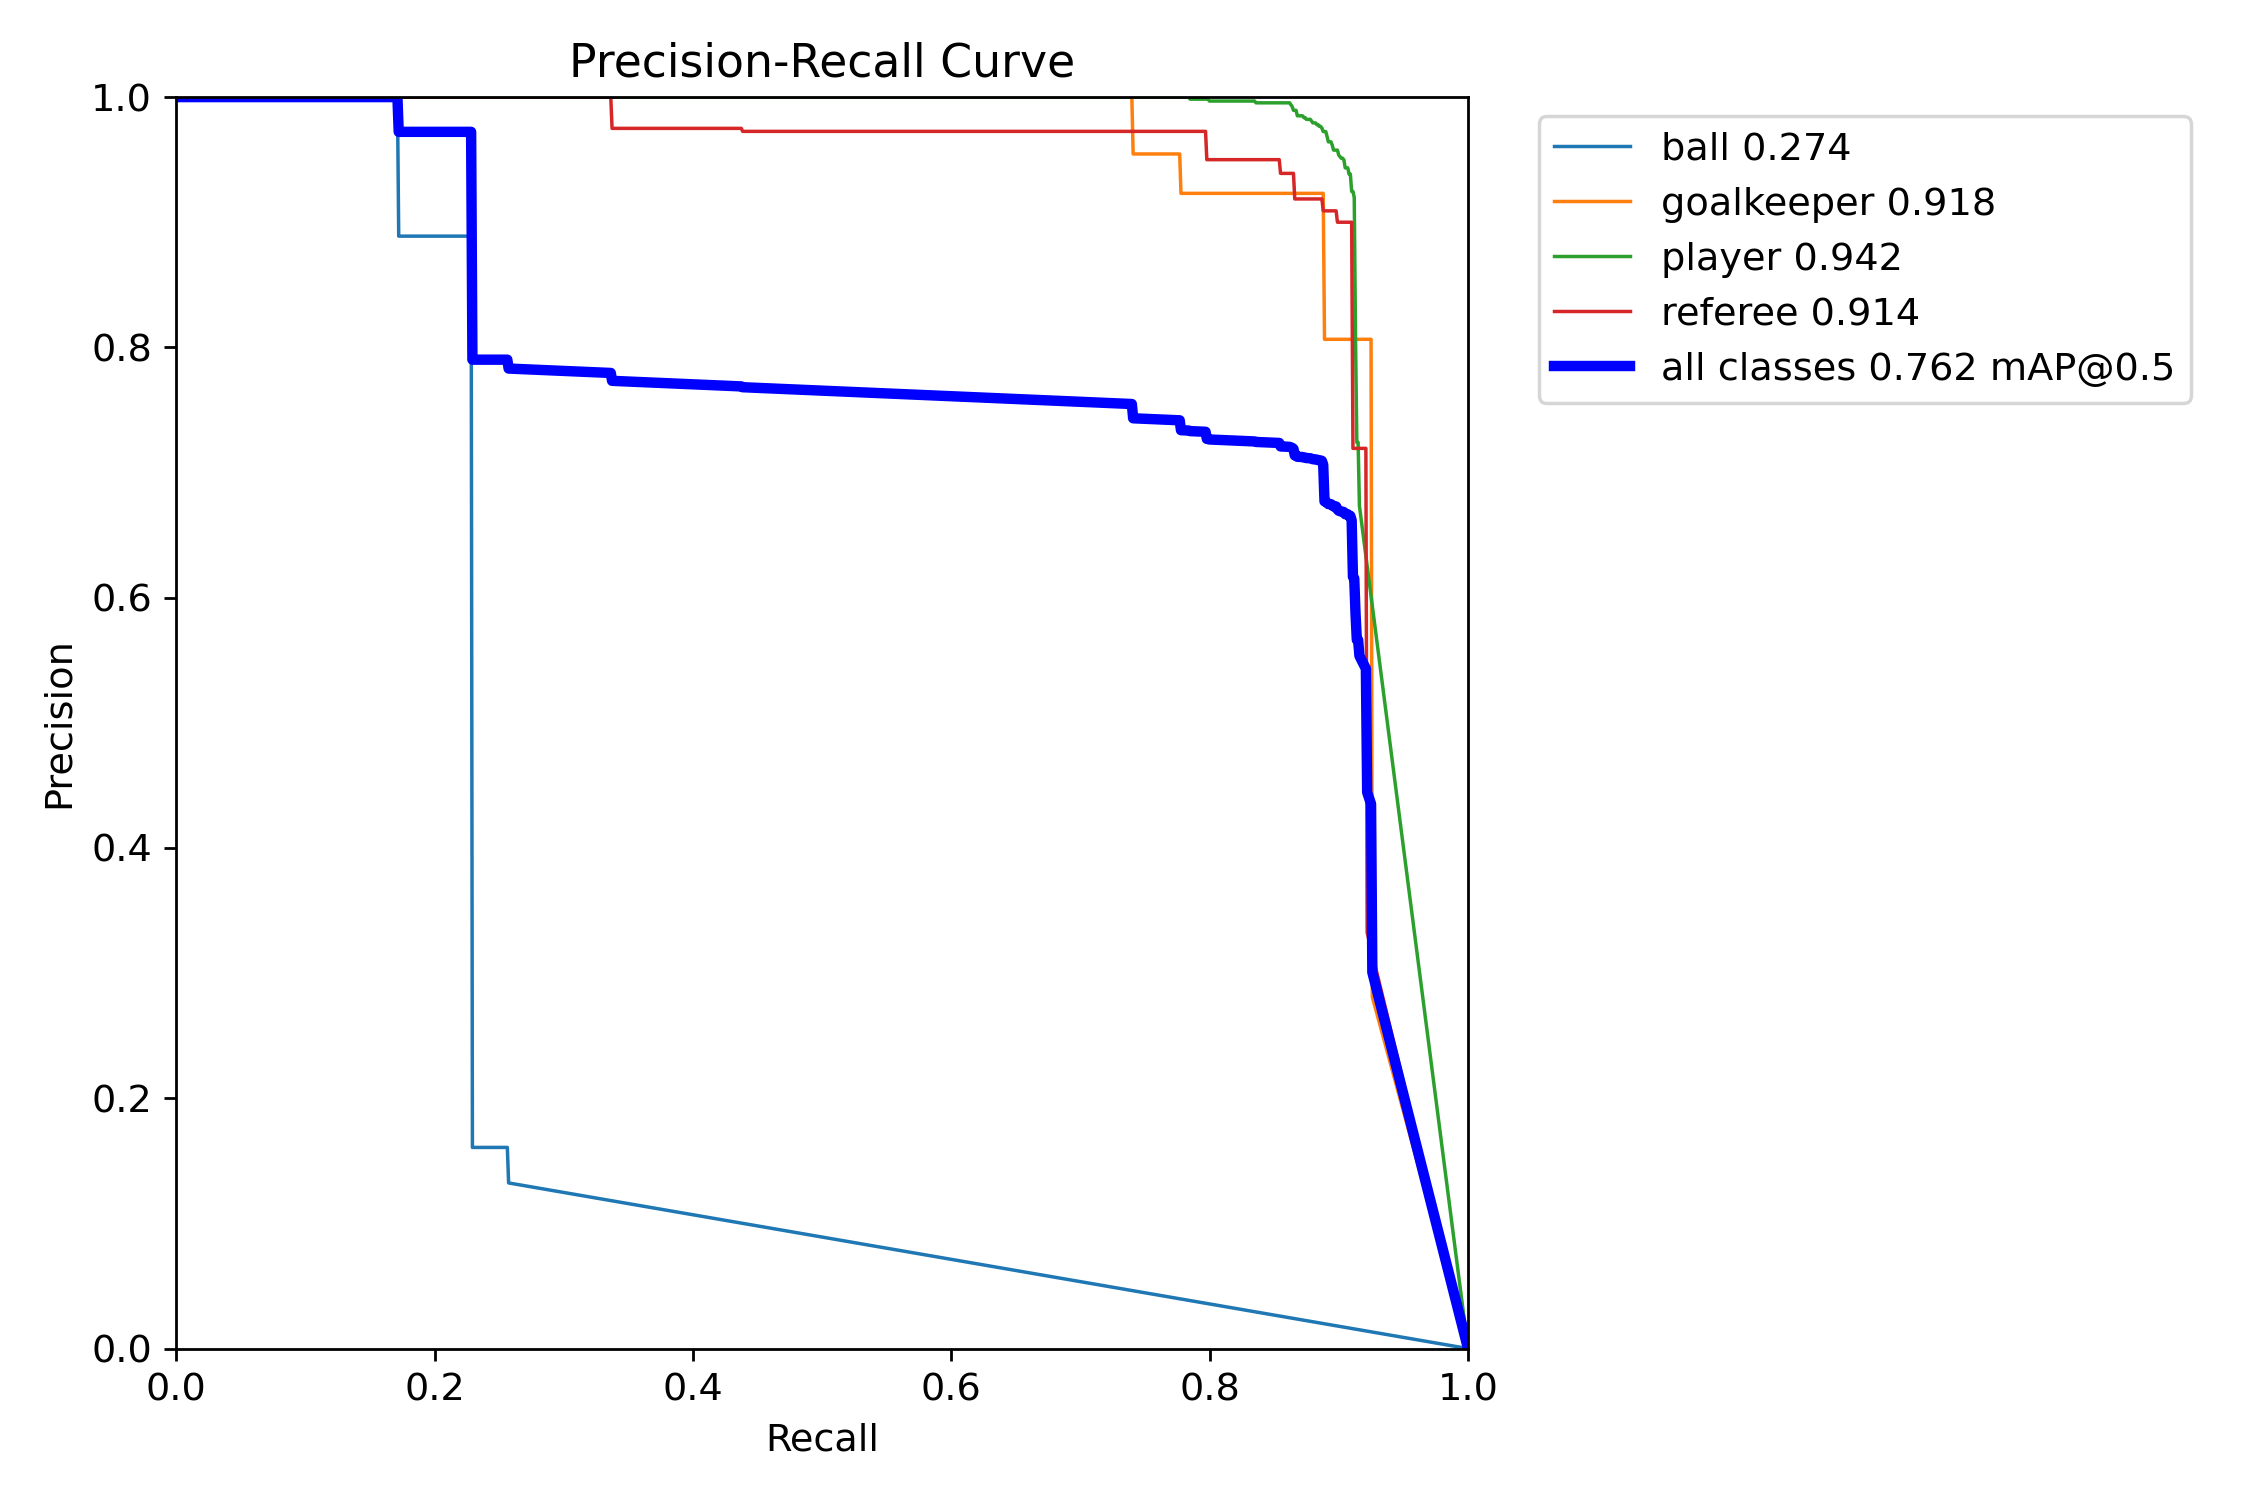

In [20]:
Image(filename=f'{PATH}/runs/detect/val/PR_curve.png', width=800)

# Testing

In [21]:
!yolo task=detect mode=predict model={PATH}/runs/detect/train/weights/best.pt conf=0.25 source={PATH}/football-players-detection-1/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

image 1/13 /content/drive/MyDrive/Football/Football_Object_Detection/football-players-detection-1/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 480x800 1 ball, 21 players, 1 referee, 172.4ms
image 2/13 /content/drive/MyDrive/Football/Football_Object_Detection/football-players-detection-1/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 480x800 1 ball, 1 goalkeeper, 21 players, 2 referees, 13.1ms
image 3/13 /content/drive/MyDrive/Football/Football_Object_Detection/football-players-detection-1/test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg: 480x800 1 goalkeeper, 19 players, 1 referee, 10.2ms
image 4/13 /content/drive/MyDrive/Football/Football_Object_Detection/football-players-detection-1/test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg: 480x8

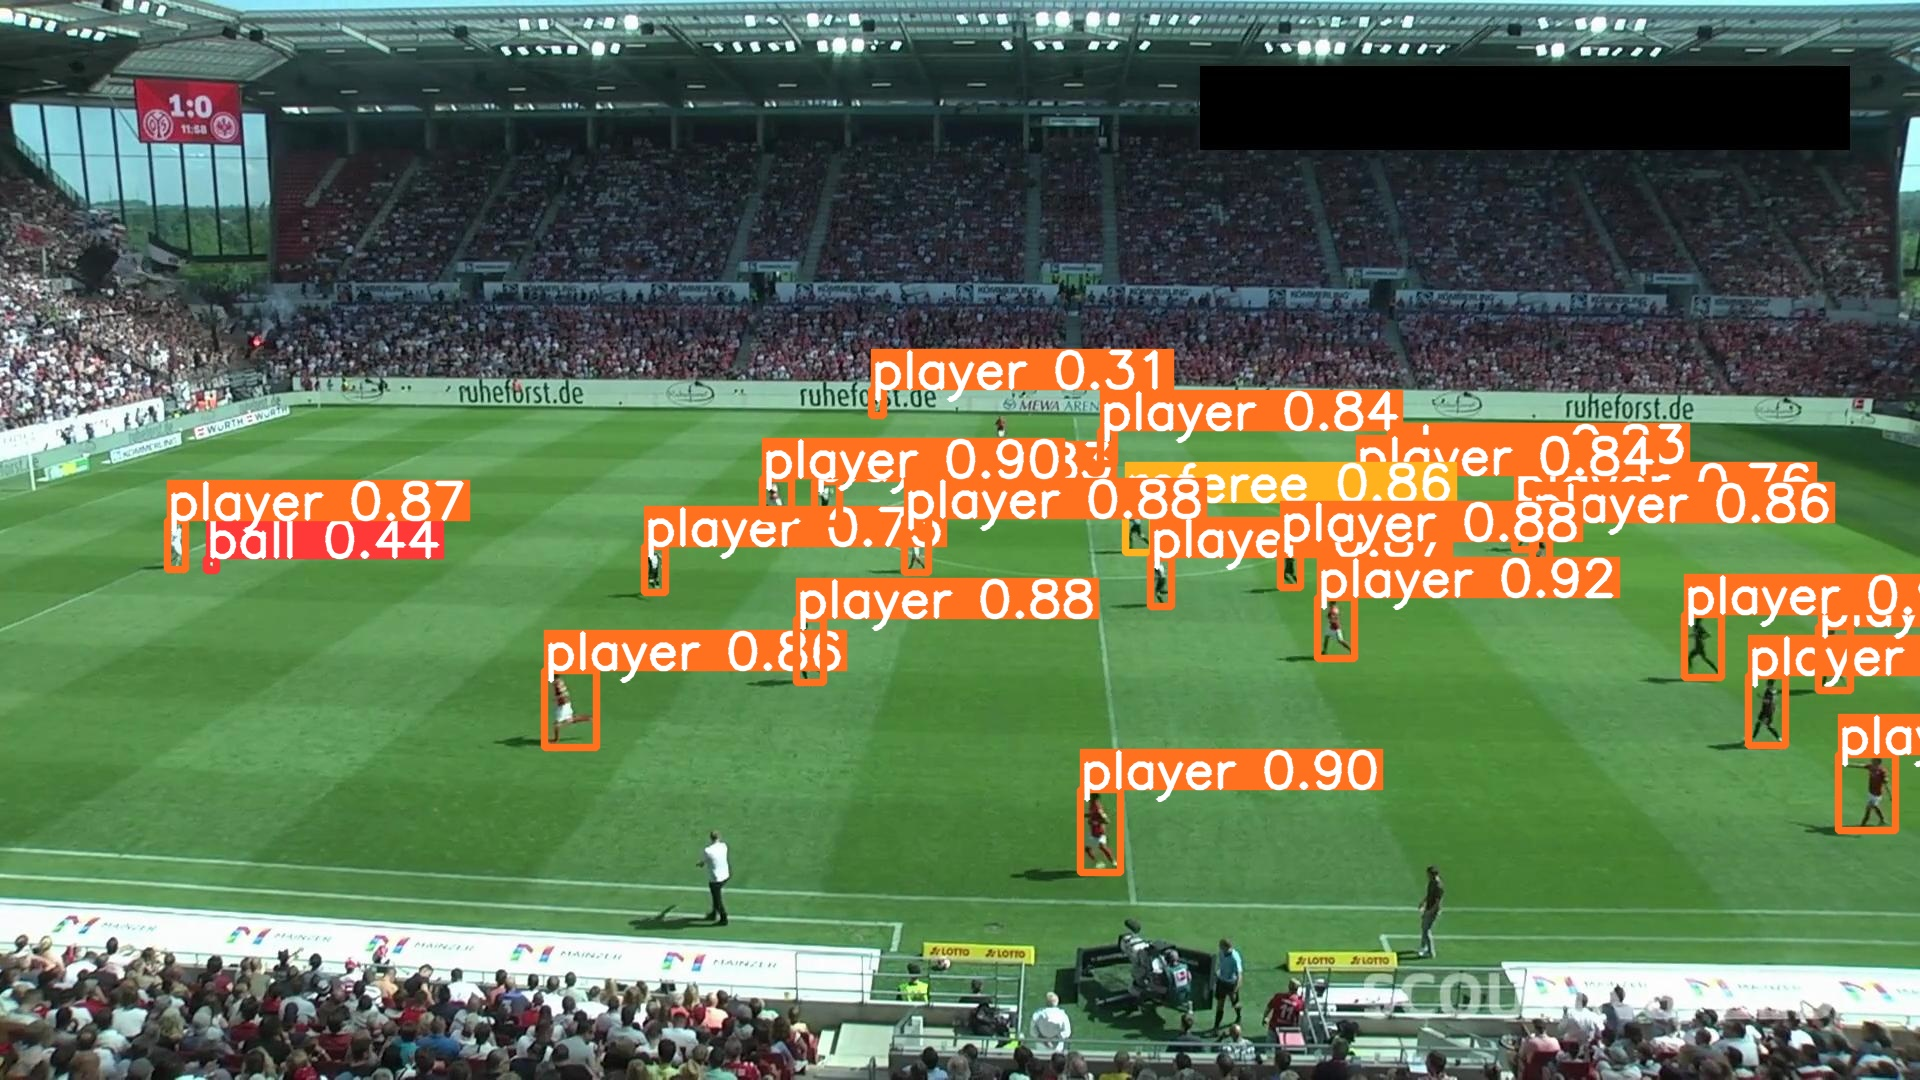

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{PATH}/runs/detect/predict/*.jpg')[:1]:
      display(Image(filename=image_path, width=1200))
      print("\n")

Video 1

In [23]:
!yolo task=detect mode=predict model={PATH}/runs/detect/train/weights/best.pt conf=0.25 source={PATH}/input_videos/08fd33_4.mp4 save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/750) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/08fd33_4.mp4: 480x800 1 ball, 1 goalkeeper, 22 players, 3 referees, 191.5ms
video 1/1 (2/750) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/08fd33_4.mp4: 480x800 1 ball, 1 goalkeeper, 21 players, 3 referees, 10.5ms
video 1/1 (3/750) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/08fd33_4.mp4: 480x800 1 ball, 1 goalkeeper, 21 players, 3 referees, 10.1ms
video 1/1 (4/750) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/08fd33_4.mp4: 480x800 1 ball, 1 goalkeeper, 22 players, 3 referees, 13.8ms
video 1/1 (5/750) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/08fd33_4.mp4: 480x800 1 ball, 1 goalkeepe

Video 2

In [24]:
!yolo task=detect mode=predict model={PATH}/runs/detect/train/weights/best.pt conf=0.25 source={PATH}/input_videos/0bfacc_7.mp4 save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/371) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/0bfacc_7.mp4: 480x800 1 goalkeeper, 21 players, 2 referees, 225.1ms
video 1/1 (2/371) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/0bfacc_7.mp4: 480x800 1 goalkeeper, 21 players, 2 referees, 11.3ms
video 1/1 (3/371) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/0bfacc_7.mp4: 480x800 1 ball, 1 goalkeeper, 21 players, 3 referees, 10.9ms
video 1/1 (4/371) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/0bfacc_7.mp4: 480x800 1 ball, 1 goalkeeper, 20 players, 3 referees, 10.9ms
video 1/1 (5/371) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/0bfacc_7.mp4: 480x800 1 ball, 1 goalkeeper, 20 players, 3

In [25]:
!yolo task=detect mode=predict model={PATH}/runs/detect/train/weights/best.pt conf=0.25 source={PATH}/input_videos/0a2d9b_5.mp4 save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/630) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/0a2d9b_5.mp4: 480x800 20 players, 2 referees, 212.5ms
video 1/1 (2/630) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/0a2d9b_5.mp4: 480x800 20 players, 2 referees, 11.6ms
video 1/1 (3/630) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/0a2d9b_5.mp4: 480x800 20 players, 2 referees, 11.0ms
video 1/1 (4/630) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/0a2d9b_5.mp4: 480x800 20 players, 2 referees, 11.3ms
video 1/1 (5/630) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/0a2d9b_5.mp4: 480x800 20 players, 2 referees, 11.1ms
video 1/1 (6/630) /content/drive/MyDrive/Football/Football_Object_Detection/input_videos/0a2d9b_5.mp4: 480x800 1 ball,